# Customer Churn Prediction Using ANN

### import the datasets

In [1]:
import pandas as pd

df=pd.read_csv("D:\Machine Learning with python\deep learning course\deep learning practice\Practice_CSV_file\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.sample(5)

<>:3: SyntaxWarning: invalid escape sequence '\M'
<>:3: SyntaxWarning: invalid escape sequence '\M'
C:\Users\jk\AppData\Local\Temp\ipykernel_7072\3823116045.py:3: SyntaxWarning: invalid escape sequence '\M'
  df=pd.read_csv("D:\Machine Learning with python\deep learning course\deep learning practice\Practice_CSV_file\WA_Fn-UseC_-Telco-Customer-Churn.csv")


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
115,3071-VBYPO,Male,0,Yes,Yes,3,Yes,No,Fiber optic,Yes,...,No,No,Yes,No,Month-to-month,No,Electronic check,89.85,248.4,No
4665,3884-UEBXB,Female,0,Yes,Yes,67,No,No phone service,DSL,Yes,...,No,No,No,No,Two year,No,Bank transfer (automatic),36.15,2434.45,No
1319,1725-MIMXW,Male,0,No,Yes,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.45,19.45,Yes
4086,2235-EZAIK,Female,0,Yes,No,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),79.20,5401.9,No
6343,0902-RFHOF,Male,0,No,No,38,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.10,730.1,No


In [3]:
len(df.columns)

21

In [10]:
df.drop("customerID",axis="columns", inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [20]:
pd.to_numeric(df["TotalCharges"], errors="coerce").isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [23]:
df[pd.to_numeric(df["TotalCharges"], errors="coerce").isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [24]:
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [25]:
df1=df[df["TotalCharges"]!=' ']
df1.shape

(7032, 20)

In [26]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [27]:
df1["TotalCharges"]=pd.to_numeric(df1["TotalCharges"])
df1.TotalCharges.dtype

C:\Users\jk\AppData\Local\Temp\ipykernel_7072\4161411149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["TotalCharges"]=pd.to_numeric(df1["TotalCharges"])


dtype('float64')

In [28]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### Visualization

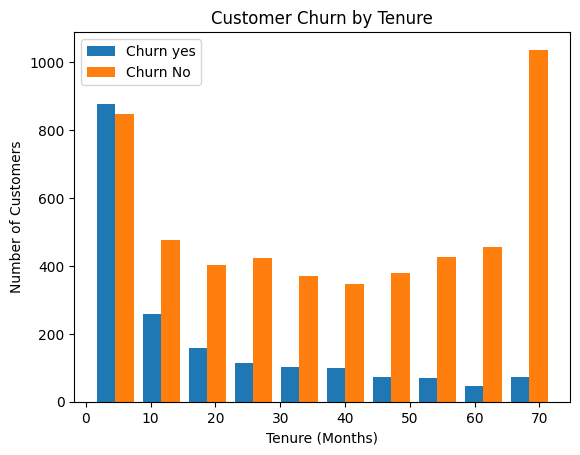

In [32]:
import matplotlib.pyplot as plt

tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure


plt.hist([tenure_churn_yes, tenure_churn_no])

plt.title('Customer Churn by Tenure')

plt.xlabel('Tenure (Months)')

plt.ylabel('Number of Customers')

plt.legend(['Churn yes', 'Churn No'])

plt.show()


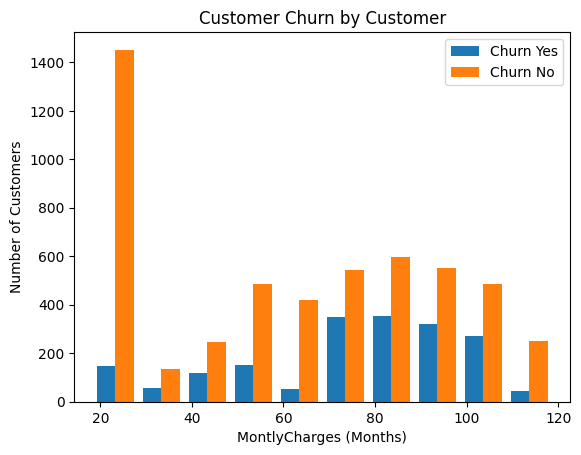

In [35]:
mc_churn_yes=df1[df1.Churn=='Yes'].MonthlyCharges
mc_churn_no=df1[df1.Churn=='No'].MonthlyCharges


plt.xlabel('MontlyCharges (Months)')
plt.ylabel('Number of Customers')
plt.title('Customer Churn by Customer')

blood_suger_men=[113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_suger_women=[67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]


plt.hist([mc_churn_yes, mc_churn_no], label=['Churn Yes', 'Churn No'])
plt.legend()

In [44]:
def print_unique_col(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f"Unique values in {column}: {df1[column].unique()}")

In [45]:
print_unique_col(df1)

Unique values in gender: ['Female' 'Male']
Unique values in Partner: ['Yes' 'No']
Unique values in Dependents: ['No' 'Yes']
Unique values in PhoneService: ['No' 'Yes']
Unique values in MultipleLines: ['No phone service' 'No' 'Yes']
Unique values in InternetService: ['DSL' 'Fiber optic' 'No']
Unique values in OnlineSecurity: ['No' 'Yes' 'No internet service']
Unique values in OnlineBackup: ['Yes' 'No' 'No internet service']
Unique values in DeviceProtection: ['No' 'Yes' 'No internet service']
Unique values in TechSupport: ['No' 'Yes' 'No internet service']
Unique values in StreamingTV: ['No' 'Yes' 'No internet service']
Unique values in StreamingMovies: ['No' 'Yes' 'No internet service']
Unique values in Contract: ['Month-to-month' 'One year' 'Two year']
Unique values in PaperlessBilling: ['Yes' 'No']
Unique values in PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Unique values in Churn: ['No' 'Yes']


In [46]:
df1.replace("No internet service", "No", inplace=True)
df1.replace("No phone service", "No", inplace=True)

C:\Users\jk\AppData\Local\Temp\ipykernel_7072\1492013314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace("No internet service", "No", inplace=True)
C:\Users\jk\AppData\Local\Temp\ipykernel_7072\1492013314.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace("No phone service", "No", inplace=True)


In [47]:
print_unique_col(df1)

Unique values in gender: ['Female' 'Male']
Unique values in Partner: ['Yes' 'No']
Unique values in Dependents: ['No' 'Yes']
Unique values in PhoneService: ['No' 'Yes']
Unique values in MultipleLines: ['No' 'Yes']
Unique values in InternetService: ['DSL' 'Fiber optic' 'No']
Unique values in OnlineSecurity: ['No' 'Yes']
Unique values in OnlineBackup: ['Yes' 'No']
Unique values in DeviceProtection: ['No' 'Yes']
Unique values in TechSupport: ['No' 'Yes']
Unique values in StreamingTV: ['No' 'Yes']
Unique values in StreamingMovies: ['No' 'Yes']
Unique values in Contract: ['Month-to-month' 'One year' 'Two year']
Unique values in PaperlessBilling: ['Yes' 'No']
Unique values in PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Unique values in Churn: ['No' 'Yes']


In [48]:
yes_no_col=["Partner", "Dependents",  "PhoneService", "MultipleLines","OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling", "Churn" ]

for col in yes_no_col:
    df1[col].replace({"Yes": 1, "No": 0}, inplace=True)
    print(f"Unique values in {col}: {df1[col].unique()}")
    

Unique values in Partner: [1 0]
Unique values in Dependents: [0 1]
Unique values in PhoneService: [0 1]
Unique values in MultipleLines: [0 1]
Unique values in OnlineSecurity: [0 1]
Unique values in OnlineBackup: [1 0]
Unique values in DeviceProtection: [0 1]
Unique values in TechSupport: [0 1]
Unique values in StreamingTV: [0 1]
Unique values in StreamingMovies: [0 1]
Unique values in PaperlessBilling: [1 0]
Unique values in Churn: [0 1]


C:\Users\jk\AppData\Local\Temp\ipykernel_7072\1047094812.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({"Yes": 1, "No": 0}, inplace=True)
C:\Users\jk\AppData\Local\Temp\ipykernel_7072\1047094812.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col].replace({"Yes": 1, "N

In [51]:
df1["gender"].replace({'Female': 1, 'Male': 0}, inplace=True)
df1["gender"].unique()

C:\Users\jk\AppData\Local\Temp\ipykernel_7072\3741251053.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["gender"].replace({'Female': 1, 'Male': 0}, inplace=True)


array([1, 0])

In [53]:
df2=pd.get_dummies(data=df1, columns=["InternetService", "Contract", "PaymentMethod"])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [54]:
cols_to_scale=["tenure", "MonthlyCharges", "TotalCharges"]
from sklearn.preprocessing import MinMaxScaler

scalar=MinMaxScaler()

df2[cols_to_scale] = scalar.fit_transform(df2[cols_to_scale])

In [55]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4948,1,0,0,0,0.042254,1,0,0,0,0,...,True,False,False,True,False,False,False,True,False,False
2082,0,0,0,1,0.281690,1,1,0,0,0,...,False,False,True,True,False,False,False,False,False,True
3459,1,0,1,1,0.408451,1,1,0,0,0,...,False,False,True,False,False,True,False,False,False,True


In [60]:
x=df2.drop("Churn", axis="columns")
y=df2["Churn"]

In [61]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [63]:
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model.fit(x_train, y_train, epochs=50)

Epoch 1/50


c:\Users\jk\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6515 - loss: 0.6034
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7903 - loss: 0.4396
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7972 - loss: 0.4234
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7938 - loss: 0.4244
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7987 - loss: 0.4156
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8135 - loss: 0.4133
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8152 - loss: 0.4024
Epoch 8/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8004 - loss: 0.4094
Epoch 9/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8027 - loss: 0.4225
Epoch 10/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8036 - loss: 0.4129
Epoch 11/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8032 - loss: 0.4123
Epoch 12/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy

In [65]:
model.evaluate(x_test, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7971 - loss: 0.4370


[0.4500652551651001, 0.7853589057922363]

In [66]:
yp=model.predict(x_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [67]:
y_pred=[]
for element in yp:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [68]:
y_pred[:10]

[0, 1, 0, 1, 0, 1, 0, 0, 0, 0]

In [69]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       999
           1       0.65      0.57      0.61       408

    accuracy                           0.79      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.78      0.79      0.78      1407



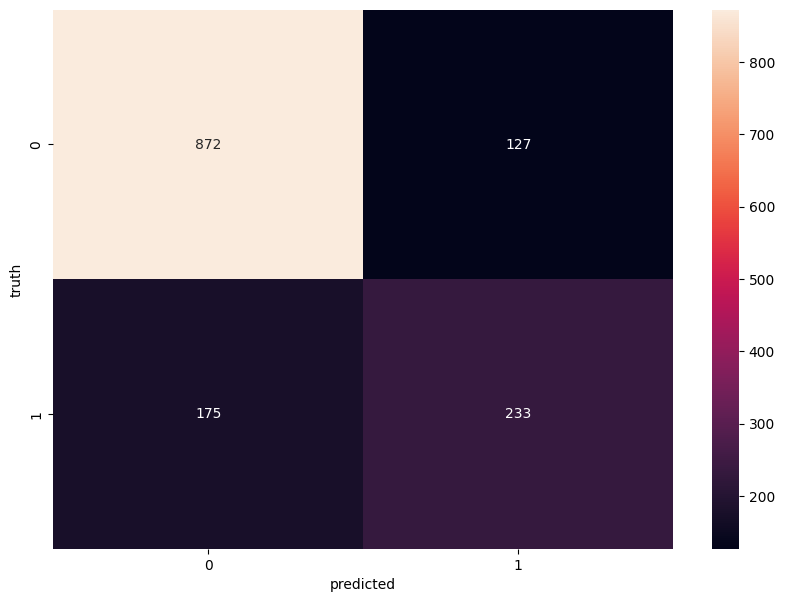

In [72]:
import seaborn as sns
cm=tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("predicted")
plt.ylabel("truth")
plt.show()

